In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("dark_background")

## 01 - Création des fonds de carte

In [2]:
df_communes = gpd.read_file("a-com2022.json")

In [3]:
df_communes.head()

,codgeo,libgeo,dep,reg,xcl2154,ycl2154,geometry
0,01001,L'Abergement-Clémenciat,01,84,848241,6563021,"POLYGON ((4.90497 46.16079, 4.90280 46.15795, ..."
1,01002,L'Abergement-de-Varey,01,84,887495,6548152,"POLYGON ((5.40440 46.00778, 5.41628 46.00056, ..."
2,01004,Ambérieu-en-Bugey,01,84,882724,6542583,"POLYGON ((5.38637 45.93121, 5.38892 45.93320, ..."
3,01005,Ambérieux-en-Dombes,01,84,847277,6545791,"POLYGON ((4.88657 46.01602, 4.88808 46.01061, ..."
4,01006,Ambléon,01,84,902191,6519791,"POLYGON ((5.59066 45.75997, 5.58396 45.76274, ..."


In [7]:
df_regions = (
    df_communes[["geometry", "reg", "xcl2154", "ycl2154"]]
    .dissolve("reg", aggfunc="mean")
    # .agg({"xcl2154": "mean", "ycl2154": "mean",})
    .reset_index()
)

df_regions.head()

,reg,geometry,xcl2154,ycl2154
0,01,"MULTIPOLYGON (((-4.17506 41.36138, -4.17450 41...",114439.375000,6.094157e+06
1,02,"POLYGON ((-2.51203 41.66824, -2.51250 41.67339...",245309.352941,6.104672e+06
2,03,"POLYGON ((-1.19566 41.48483, -1.19623 41.48451...",361750.454545,6.119508e+06
3,04,"POLYGON ((0.23016 41.66746, 0.22346 41.66869, ...",466220.916667,6.098942e+06
4,06,"MULTIPOLYGON (((1.26497 41.79652, 1.26733 41.7...",554759.764706,6.099832e+06


## 02 - Fusion des jeux de données

In [8]:
df = pd.read_parquet("clean_data_regions.parquet")
df["code_region"] = ("0" + df["code_region"].astype(str) ).str[-2:]
df.head()

,code_region,hommes-sans_diplomes,hommes-diplome_cep,hommes-diplome_bepc,hommes-diplome_cap,hommes-diplome_bac,hommes-diplome_1e_cycle,hommes-diplome_2e_cycle,femmes-sans_diplomes,femmes-diplome_cep,...,ratio-femmes-diplome_cap,ratio-femmes-diplome_bac,ratio-femmes-diplome_1e_cycle,ratio-femmes-diplome_2e_cycle,ratio-hommes-non_education_superieure,ratio-hommes-education_superieure,ratio-femmes-non_education_superieure,ratio-femmes-education_superieure,ratio-non_education_superieure,ratio-education_superieure
0,01,36116.710061,7190.016524,6711.551265,30667.071906,21826.848043,10216.901203,1.563873e+04,41825.121728,10844.164693,...,0.099764,0.103990,0.056617,0.080028,0.355017,0.089542,0.418796,0.136645,0.773813,0.226187
1,02,33214.442451,8124.804770,7508.705655,29140.483958,21266.348905,9724.446503,1.613265e+04,35151.384423,10567.973264,...,0.100928,0.103055,0.055872,0.093052,0.355024,0.092488,0.403564,0.148924,0.758588,0.241412
2,03,33266.641804,1512.130941,3855.526862,15387.883810,11882.205443,4855.382961,1.020833e+04,38270.230104,2213.520546,...,0.072537,0.075976,0.033080,0.070255,0.391170,0.089409,0.416086,0.103335,0.807255,0.192745
3,04,93572.198572,7880.734726,13127.946011,67838.814651,45718.323350,21228.725976,3.588587e+04,109455.295695,10054.964182,...,0.089646,0.095162,0.044322,0.074291,0.375673,0.094050,0.411663,0.118613,0.787336,0.212664
4,11,610272.833956,138768.114435,186421.584304,752996.926025,692959.660860,434107.252739,1.441451e+06,619401.723355,226140.479244,...,0.074120,0.089486,0.060484,0.179003,0.266056,0.209541,0.284916,0.239487,0.550973,0.449027


In [9]:
df = df_regions.merge(
    
    right=df,
    how="right",
    right_on=["code_region"],
    left_on=["reg"],
)

In [10]:
df.isna().sum()

reg                                      1
geometry                                 1
xcl2154                                  1
ycl2154                                  1
code_region                              0
hommes-sans_diplomes                     0
hommes-diplome_cep                       0
hommes-diplome_bepc                      0
hommes-diplome_cap                       0
hommes-diplome_bac                       0
hommes-diplome_1e_cycle                  0
hommes-diplome_2e_cycle                  0
femmes-sans_diplomes                     0
femmes-diplome_cep                       0
femmes-diplome_bepc                      0
femmes-diplome_cap                       0
femmes-diplome_bac                       0
femmes-diplome_1e_cycle                  0
femmes-diplome_2e_cycle                  0
hommes-non_education_superieure          0
hommes-education_superieure              0
femmes-non_education_superieure          0
femmes-education_superieure              0
non_educati

In [11]:
df[df["reg"].isna()]

,reg,geometry,xcl2154,ycl2154,code_region,hommes-sans_diplomes,hommes-diplome_cep,hommes-diplome_bepc,hommes-diplome_cap,hommes-diplome_bac,...,ratio-femmes-diplome_cap,ratio-femmes-diplome_bac,ratio-femmes-diplome_1e_cycle,ratio-femmes-diplome_2e_cycle,ratio-hommes-non_education_superieure,ratio-hommes-education_superieure,ratio-femmes-non_education_superieure,ratio-femmes-education_superieure,ratio-non_education_superieure,ratio-education_superieure
9,NaN,None,NaN,NaN,41,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 03 - Niveau d'éducation supérieure par région

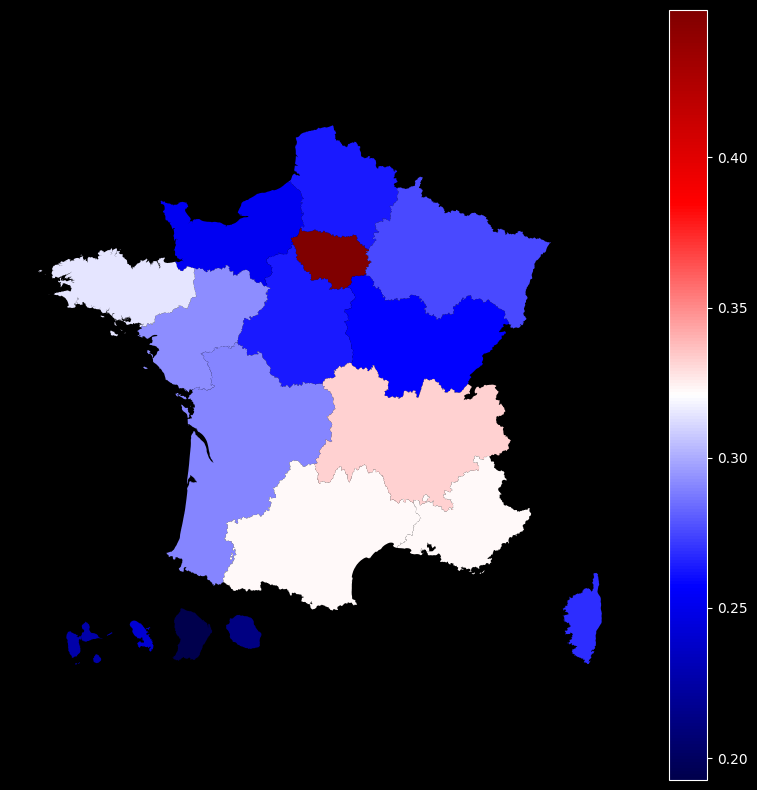

In [14]:
fix, ax = plt.subplots(1, 1, figsize=(10, 10))

df.plot(
    "ratio-education_superieure",
    ax=ax,
    cmap="seismic",
    legend=True
)

ax.axis("off")

plt.show()